# Bangalore House Price Prediction

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

pd.pandas.set_option('display.max_columns',None)

## Read Data into Python

In [31]:
df1=pd.read_csv(r'C:\Users\sarthak\Downloads\train-chennai-sale.csv')
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df1.shape

(7109, 22)

In [33]:
df1.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

## Returns all columns in the database

In [9]:
df1.columns
df2 = df1.drop(['PRT_ID','COMMIS','REG_FEE'],axis='columns')
df2.shape

(7109, 19)

In [10]:
#df2['N_BEDROOM'].fillna(value = df2.N_BEDROOM.mean(), inplace = True)
#df2['N_BATHROOM'].fillna(value = df2.N_BATHROOM.mean(), inplace = True)

In [11]:
#df2.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='QS_OVERALL'>

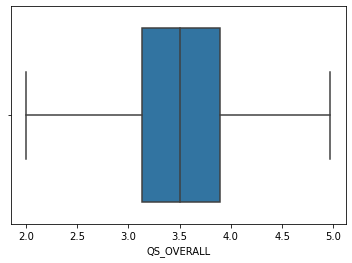

In [12]:
sns.boxplot(df2['QS_OVERALL']) #Plotting to check for any outliers in the data.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N_BEDROOM'>

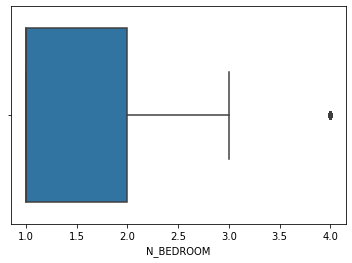

In [13]:
sns.boxplot(df2['N_BEDROOM'])  #Plotting to check for any outliers in the data.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N_BATHROOM'>

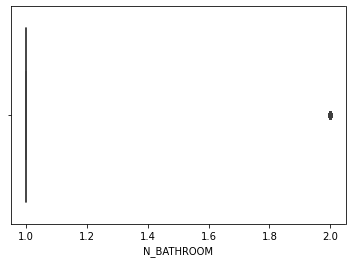

In [14]:
sns.boxplot(df2['N_BATHROOM'])  #Plotting to check for any outliers in the data.

In [15]:
## HEnce from the above plot, it was seen that N_BEDROOM and N_BATHROOM have outliers present.
## Lets check for missing value as a part of data cleaning.

In [16]:
#df2['QS_OVERALL'].fillna(method = 'ffill', limit = 2, inplace = True
df2.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [17]:
#df2.N_BEDROOM.describe()

In [18]:
#df2.N_BATHROOM.describe()

In [19]:
df2['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [20]:
mapper = {'Karapakam':'Karapakkam','Chrmpet':'Chrompet', 'Chrompt': 'Chrompet','Chormpet':'Chrompet','KKNagar':'KK Nagar','Velchery':'Velachery','Ann Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'}
for k, v in mapper.items():
  df2.loc[df2['AREA'].str.contains(k), 'AREA'] = v

In [21]:
df2['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

Text(0.5, 1.0, 'AREA')

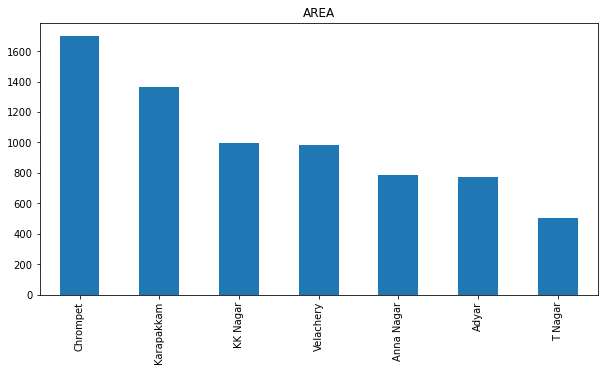

In [22]:
plt.figure(figsize=(10,5))
df2['AREA'].value_counts().plot(kind='bar');
plt.title('AREA')

In [23]:
#From both DATE_SALE and DATE_BUILD columns we can create the HOUSE_AGE column
df2['DATE_SALE'] = pd.to_datetime(df2['DATE_SALE'])
df2['DATE_BUILD'] = pd.to_datetime(df2['DATE_BUILD'])
df2['HOUSE_AGE'] = df2['DATE_SALE'] - df2['DATE_BUILD']

In [24]:
#Since we have HOUSE_AGE as the new column then can drop both DATE_SALE AND DATE_BUILD columns
df2=df2.drop(['DATE_SALE','DATE_BUILD'],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DIST_MAINROAD'>

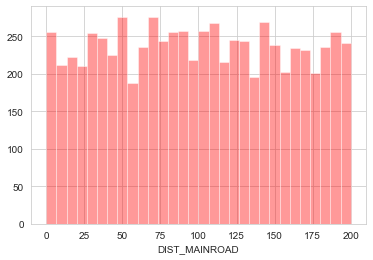

In [25]:
sns.set_style('whitegrid')
sns.distplot(df2['DIST_MAINROAD'], kde = False, color ='red', bins = 30)


In [26]:
df2['QS_OVERALL']=df2['QS_OVERALL'].fillna(df2['QS_OVERALL'].mean()) ##Filling out null values wih mean

In [27]:
df2=df2.dropna() #Since those values are less, we can drop the values

In [28]:
df2.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
HOUSE_AGE        0
dtype: int64

In [29]:
df2['DATE_SALE'] = pd.to_datetime(df2['DATE_SALE'])
df2['DATE_BUILD'] = pd.to_datetime(df2['DATE_BUILD'])
df2['HOUSE_AGE'] = df2['DATE_SALE'] - df2['DATE_BUILD']  ##NEw column HOUSE_AGE created from DATE_SALE and DATE_BUILD

KeyError: 'DATE_SALE'

In [ ]:
df2=df2.drop(['DATE_SALE','DATE_BUILD'],axis=1)   #Since now new Column created,Old ones got to be deleted

In [ ]:
df2=df2.drop(['DATE_SALE','DATE_BUILD'],axis=0)